# Time series

In [168]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [169]:
%matplotlib inline

## Date and Time Data Types and Tools

In [3]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2016, 12, 13, 13, 22, 40, 332477)

In [4]:
now.year, now.month, now.day

(2016, 12, 13)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [6]:
delta.days

926

In [7]:
delta.seconds

56700

In [8]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting between string and datetime

In [10]:
stamp = datetime(2011, 1, 3)

In [11]:
str(stamp)

'2011-01-03 00:00:00'

In [19]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [20]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [21]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [22]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [23]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [24]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [25]:
datestrs

['7/6/2011', '8/6/2011']

In [26]:
pd.to_datetime(datestrs)
# note: output changed (no '00:00:00' anymore)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [27]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [28]:
idx[2]

NaT

In [30]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

In [33]:
# ha ha ha
parse('42')

datetime.datetime(2042, 12, 13, 0, 0)

## Time Series Basics

In [38]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.956839
2011-01-05    1.378979
2011-01-07   -1.530768
2011-01-08    0.979506
2011-01-10   -0.246862
2011-01-12    1.033676
dtype: float64

In [35]:
type(ts)
# note: output changed to "pandas.core.series.Series"

pandas.core.series.Series

In [36]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [37]:
ts + ts[::2]

2011-01-02    1.667636
2011-01-05         NaN
2011-01-07   -1.616370
2011-01-08         NaN
2011-01-10   -1.896524
2011-01-12         NaN
dtype: float64

In [44]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

In [45]:
stamp = ts.index[0]
stamp
# note: output changed from <Timestamp: 2011-01-02 00:00:00> to Timestamp('2011-01-02 00:00:00')

Timestamp('2011-01-02 00:00:00')

### Indexing, selection, subsetting

In [46]:
stamp = ts.index[2]
ts[stamp]

-1.5307680597023781

In [47]:
ts['1/10/2011']

-0.24686237819589865

In [48]:
ts['20110110']

-0.24686237819589865

In [49]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.193059
2000-01-02   -1.265974
2000-01-03    0.941539
2000-01-04   -1.585020
2000-01-05   -0.250935
2000-01-06    0.106549
                ...   
2002-09-21   -0.500173
2002-09-22   -0.568601
2002-09-23    0.075280
2002-09-24   -0.416594
2002-09-25    0.262046
2002-09-26   -0.649044
Freq: D, dtype: float64

In [50]:
longer_ts['2001']

2001-01-01   -1.512122
2001-01-02    1.567454
2001-01-03   -0.611759
2001-01-04   -1.299997
2001-01-05   -0.371124
2001-01-06   -1.142505
                ...   
2001-12-26   -0.177262
2001-12-27    1.050777
2001-12-28    0.224843
2001-12-29   -1.214345
2001-12-30   -1.125407
2001-12-31   -1.722052
Freq: D, dtype: float64

In [51]:
longer_ts['2001-05']

2001-05-01   -0.838430
2001-05-02    1.216075
2001-05-03   -0.323692
2001-05-04    0.003401
2001-05-05   -1.441642
2001-05-06   -0.291643
                ...   
2001-05-26    0.573314
2001-05-27    0.039597
2001-05-28   -1.191289
2001-05-29   -1.053264
2001-05-30   -0.774027
2001-05-31   -1.857321
Freq: D, dtype: float64

In [52]:
ts[datetime(2011, 1, 7):]

2011-01-07   -1.530768
2011-01-08    0.979506
2011-01-10   -0.246862
2011-01-12    1.033676
dtype: float64

In [53]:
ts

2011-01-02   -0.956839
2011-01-05    1.378979
2011-01-07   -1.530768
2011-01-08    0.979506
2011-01-10   -0.246862
2011-01-12    1.033676
dtype: float64

In [57]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.530768
2011-01-08    0.979506
2011-01-10   -0.246862
dtype: float64

In [58]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.956839
2011-01-05    1.378979
2011-01-07   -1.530768
2011-01-08    0.979506
dtype: float64

In [61]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.ix['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.099059,-0.601258,0.766222,-0.615153
2001-05-09,-2.595768,1.448055,-0.302895,-0.038694
2001-05-16,0.082183,-0.377533,-0.426008,-0.770125
2001-05-23,-0.905552,-0.382039,-0.576524,-1.769695
2001-05-30,0.673500,-0.604173,0.703213,-0.897363


### Time series with duplicate indices

In [62]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [63]:
dup_ts.index.is_unique

False

In [64]:
dup_ts['1/3/2000']  # not duplicated

4

In [65]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [75]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [76]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date ranges, Frequencies, and Shifting

In [90]:
ts

2011-01-02   -0.956839
2011-01-05    1.378979
2011-01-07   -1.530768
2011-01-08    0.979506
2011-01-10   -0.246862
2011-01-12    1.033676
dtype: float64

In [91]:
ts.resample('D').mean()

2011-01-02   -0.956839
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    1.378979
2011-01-06         NaN
2011-01-07   -1.530768
2011-01-08    0.979506
2011-01-09         NaN
2011-01-10   -0.246862
2011-01-11         NaN
2011-01-12    1.033676
Freq: D, dtype: float64

### Generating date ranges

In [92]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [93]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [94]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [95]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [96]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [97]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [98]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [99]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [100]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [101]:
Hour(2) + Minute(30)

<150 * Minutes>

In [103]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [111]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', offset='WOM-3FRI')]

### Shifting (leading and lagging) data

In [112]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.755095
2000-02-29    0.350509
2000-03-31    0.706236
2000-04-30   -0.389958
Freq: M, dtype: float64

In [113]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.755095
2000-04-30    0.350509
Freq: M, dtype: float64

In [114]:
ts.shift(-2)

2000-01-31    0.706236
2000-02-29   -0.389958
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [115]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.535807
2000-03-31    1.014884
2000-04-30   -1.552164
Freq: M, dtype: float64

In [116]:
ts.shift(2, freq='M')

2000-03-31    0.755095
2000-04-30    0.350509
2000-05-31    0.706236
2000-06-30   -0.389958
Freq: M, dtype: float64

In [117]:
ts.shift(3, freq='D')

2000-02-03    0.755095
2000-03-03    0.350509
2000-04-03    0.706236
2000-05-03   -0.389958
dtype: float64

In [118]:
ts.shift(1, freq='3D')

2000-02-03    0.755095
2000-03-03    0.350509
2000-04-03    0.706236
2000-05-03   -0.389958
dtype: float64

In [119]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.755095
2000-02-29 01:30:00    0.350509
2000-03-31 01:30:00    0.706236
2000-04-30 01:30:00   -0.389958
Freq: M, dtype: float64

#### Shifting dates with offsets

In [126]:
# from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day(1)

Timestamp('2011-11-20 00:00:00')

In [127]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [128]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [129]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [130]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [132]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -1.760927
2000-01-19    2.105113
2000-01-23    0.275128
2000-01-27   -0.750706
2000-01-31    0.747326
2000-02-04   -1.271670
                ...   
2000-03-11   -0.601267
2000-03-15   -0.602691
2000-03-19   -1.041458
2000-03-23   -1.318778
2000-03-27    1.004118
2000-03-31    2.474858
Freq: 4D, dtype: float64

In [133]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.123187
2000-02-29   -0.734467
2000-03-31   -0.111613
dtype: float64

In [135]:
ts.resample('M').mean()

2000-01-31    0.123187
2000-02-29   -0.734467
2000-03-31   -0.111613
Freq: M, dtype: float64

## Time Zone Handling

In [137]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [139]:
pytz.common_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi

In [145]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### Localization and Conversion

In [146]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [206]:
print(ts.index.tz)

None


In [160]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [156]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.428687
2012-03-10 09:30:00+00:00   -0.256694
2012-03-11 09:30:00+00:00    1.426711
2012-03-12 09:30:00+00:00   -0.289074
2012-03-13 09:30:00+00:00    0.441281
2012-03-14 09:30:00+00:00    1.598025
Freq: D, dtype: float64

In [158]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [161]:
ts_utc.index.tz

<UTC>

In [163]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -1.428687
2012-03-10 04:30:00-05:00   -0.256694
2012-03-11 05:30:00-04:00    1.426711
2012-03-12 05:30:00-04:00   -0.289074
2012-03-13 05:30:00-04:00    0.441281
2012-03-14 05:30:00-04:00    1.598025
Freq: D, dtype: float64

In [176]:
ts_utc.index.tz

<UTC>

In [175]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.428687
2012-03-10 14:30:00+00:00   -0.256694
2012-03-11 13:30:00+00:00    1.426711
2012-03-12 13:30:00+00:00   -0.289074
2012-03-13 13:30:00+00:00    0.441281
2012-03-14 13:30:00+00:00    1.598025
Freq: D, dtype: float64

In [196]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.428687
2012-03-10 15:30:00+01:00   -0.256694
2012-03-11 14:30:00+01:00    1.426711
2012-03-12 14:30:00+01:00   -0.289074
2012-03-13 14:30:00+01:00    0.441281
2012-03-14 14:30:00+01:00    1.598025
Freq: D, dtype: float64

In [198]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [199]:
ts

2012-03-09 09:30:00   -1.428687
2012-03-10 09:30:00   -0.256694
2012-03-11 09:30:00    1.426711
2012-03-12 09:30:00   -0.289074
2012-03-13 09:30:00    0.441281
2012-03-14 09:30:00    1.598025
Freq: D, dtype: float64

### Operations with time zone-aware Timestamp objects

In [208]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [204]:
stamp_utc.tz

<UTC>

In [209]:
stamp.tz

In [210]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [211]:
stamp_utc.value

1299902400000000000

In [212]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [234]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [235]:
stamp.tz

<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>

In [232]:
stamp + Hour(1)

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [237]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [238]:
stamp.tz

<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>

In [233]:
stamp + 2*Hour()

Timestamp('2012-03-12 03:30:00-0400', tz='US/Eastern')

### Operations between different time zones

In [239]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.991052
2012-03-08 09:30:00   -0.352359
2012-03-09 09:30:00    1.044107
2012-03-12 09:30:00   -0.060335
2012-03-13 09:30:00    0.530911
2012-03-14 09:30:00   -2.094734
2012-03-15 09:30:00   -0.720653
2012-03-16 09:30:00    0.068369
2012-03-19 09:30:00   -1.725171
2012-03-20 09:30:00    0.103971
Freq: B, dtype: float64

In [240]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')


In [244]:
ts1.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='B')

In [245]:
ts2.index

DatetimeIndex(['2012-03-09 13:30:00+04:00', '2012-03-12 13:30:00+04:00',
               '2012-03-13 13:30:00+04:00', '2012-03-14 13:30:00+04:00',
               '2012-03-15 13:30:00+04:00'],
              dtype='datetime64[ns, Europe/Moscow]', freq='B')

In [243]:
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic

In [246]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [247]:
p + 5

Period('2012', 'A-DEC')

In [248]:
p - 2

Period('2005', 'A-DEC')

In [249]:
pd.Period('2014', freq='A-DEC') - p

7

In [250]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [254]:
Series(np.random.randn(6), index=rng).index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [256]:
Series(np.random.randn(6), index=rng)

2000-01    0.559301
2000-02    0.542269
2000-03   -0.157874
2000-04   -0.242702
2000-05   -0.114227
2000-06   -0.578140
Freq: M, dtype: float64

In [258]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

### Period Frequency Conversion

In [261]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [262]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [263]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [264]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [265]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [266]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [268]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='int64', freq='A-DEC')

In [269]:
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006   -1.115063
2007    1.825672
2008    0.114213
2009   -1.265856
Freq: A-DEC, dtype: float64

In [270]:
ts.asfreq('M', how='start')

2006-01   -1.115063
2007-01    1.825672
2008-01    0.114213
2009-01   -1.265856
Freq: M, dtype: float64

In [271]:
ts.asfreq('B', how='end')

2006-12-29   -1.115063
2007-12-31    1.825672
2008-12-31    0.114213
2009-12-31   -1.265856
Freq: B, dtype: float64

### Quarterly period frequencies

In [272]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [273]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [275]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [279]:
p.asfreq('B', 'end')-1

Period('2012-01-30', 'B')

In [283]:
p.asfreq('T', 'start')

Period('2011-11-01 01:00', 'T')

In [281]:
(p.asfreq('B', 'e') - 1).asfreq('T', 's') 

Period('2012-01-30 00:00', 'T')

In [282]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [284]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [294]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [295]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='int64', freq='T')

In [296]:
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and back)

In [304]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [305]:
ts = Series(randn(3), index=rng)
ts

2000-01-31   -1.038546
2000-02-29   -2.161578
2000-03-31    0.092724
Freq: M, dtype: float64

In [291]:
pts = ts.to_period()
pts

2000-01    1.57408
2000-02    1.83763
2000-03    0.47729
Freq: M, dtype: float64

In [298]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
rng

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [301]:
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01    1.791490
2000-01   -0.738127
2000-01    2.493156
2000-02    1.116493
2000-02   -0.512681
2000-02   -0.943032
Freq: M, dtype: float64

In [307]:
pts = ts.to_period()
pts

2000-01   -1.038546
2000-02   -2.161578
2000-03    0.092724
Freq: M, dtype: float64

In [308]:
pts.to_timestamp(how='end')

2000-01-31   -1.038546
2000-02-29   -2.161578
2000-03-31    0.092724
Freq: M, dtype: float64

### Creating a PeriodIndex from arrays

In [310]:
data = pd.read_csv('ch08/macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2008.0,2.0,13415.266,9351.0,2026.518,961.280,10059.0,218.610,1409.3,1.74,5.4,304.483,8.53,-6.79
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91


In [311]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
        ...  
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

In [312]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
      ... 
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, dtype: float64

In [313]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')

In [315]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

## Resampling and Frequency Conversion

In [316]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [317]:
ts = Series(randn(len(rng)), index=rng)
ts

2000-01-01   -0.555028
2000-01-02   -0.380643
2000-01-03    1.452284
2000-01-04    1.070579
2000-01-05    1.477822
2000-01-06   -0.801269
                ...   
2000-04-04   -0.674470
2000-04-05    0.772452
2000-04-06    0.262655
2000-04-07    0.699383
2000-04-08    0.371785
2000-04-09   -0.914637
Freq: D, dtype: float64

In [319]:
ts.resample('M').mean()

2000-01-31   -0.142162
2000-02-29    0.192561
2000-03-31    0.018747
2000-04-30    0.051949
Freq: M, dtype: float64

In [320]:
ts.resample('M', how='mean', kind='period')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


2000-01   -0.142162
2000-02    0.192561
2000-03    0.018747
2000-04    0.051949
Freq: M, dtype: float64

### Downsampling

In [321]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [322]:
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [333]:
ts.resample('5min', how='sum', closed = 'left', label = 'left')
# note: output changed (as the default changed from closed='right', label='right' to closed='left', label='left'

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [336]:
ts.resample('5min', how='sum', closed='right', label='right')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [331]:
ts.resample('5min', how='sum', closed='right', label='right')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [339]:
ts.resample('5min', how='sum', loffset='-1s')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [340]:
ts.resample('5min', how='ohlc')
# note: output changed because of changed defaults

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  if __name__ == '__main__':


,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy

In [343]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [344]:
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [345]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### Upsampling and interpolation

In [346]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.069687,0.024695,0.403737,-0.645088
2000-01-12,-1.222864,-0.447346,-1.035636,1.068834


In [347]:
df_daily = frame.resample('D')
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.069687,0.024695,0.403737,-0.645088
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.222864,-0.447346,-1.035636,1.068834


In [348]:
frame.resample('D', fill_method='ffill')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000-01-05,-0.069687,0.024695,0.403737,-0.645088
2000-01-06,-0.069687,0.024695,0.403737,-0.645088
2000-01-07,-0.069687,0.024695,0.403737,-0.645088
2000-01-08,-0.069687,0.024695,0.403737,-0.645088
2000-01-09,-0.069687,0.024695,0.403737,-0.645088
2000-01-10,-0.069687,0.024695,0.403737,-0.645088
2000-01-11,-0.069687,0.024695,0.403737,-0.645088
2000-01-12,-1.222864,-0.447346,-1.035636,1.068834


In [349]:
frame.resample('D', fill_method='ffill', limit=2)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=2)
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000-01-05,-0.069687,0.024695,0.403737,-0.645088
2000-01-06,-0.069687,0.024695,0.403737,-0.645088
2000-01-07,-0.069687,0.024695,0.403737,-0.645088
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.222864,-0.447346,-1.035636,1.068834


In [352]:
frame.resample('W-THU',fill_method='ffill')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000-01-06,-0.069687,0.024695,0.403737,-0.645088
2000-01-13,-1.222864,-0.447346,-1.035636,1.068834


### Resampling with periods

In [353]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.015157,1.462125,-1.405332,0.238129
2000-02,-0.786834,-1.747904,0.259120,-0.022648
2000-03,-0.146244,-0.416296,-0.410893,0.372900
2000-04,-0.542717,0.440147,-1.315037,-0.328661
2000-05,0.426909,-0.618569,0.256645,-0.299510


In [354]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000,-0.258892,-0.265439,-0.167361,0.103295
2001,-0.102251,-0.035122,-0.066185,-0.368789


In [363]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC', fill_method='ffill')
# note: output changed, default value changed from convention='end' to convention='start' + 'start' changed to span-like
# also the following cells

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  from ipykernel import kernelapp as app


,Colorado,Texas,New York,Ohio
2000Q1,-0.258892,-0.265439,-0.167361,0.103295
2000Q2,-0.258892,-0.265439,-0.167361,0.103295
2000Q3,-0.258892,-0.265439,-0.167361,0.103295
2000Q4,-0.258892,-0.265439,-0.167361,0.103295
2001Q1,-0.102251,-0.035122,-0.066185,-0.368789
2001Q2,-0.102251,-0.035122,-0.066185,-0.368789
2001Q3,-0.102251,-0.035122,-0.066185,-0.368789
2001Q4,-0.102251,-0.035122,-0.066185,-0.368789


In [364]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000Q1,-0.258892,-0.265439,-0.167361,0.103295
2000Q2,-0.258892,-0.265439,-0.167361,0.103295
2000Q3,-0.258892,-0.265439,-0.167361,0.103295
2000Q4,-0.258892,-0.265439,-0.167361,0.103295
2001Q1,-0.102251,-0.035122,-0.066185,-0.368789
2001Q2,-0.102251,-0.035122,-0.066185,-0.368789
2001Q3,-0.102251,-0.035122,-0.066185,-0.368789
2001Q4,-0.102251,-0.035122,-0.066185,-0.368789


In [361]:
annual_frame.resample('Q-MAR', fill_method='ffill')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000Q4,-0.258892,-0.265439,-0.167361,0.103295
2001Q1,-0.258892,-0.265439,-0.167361,0.103295
2001Q2,-0.258892,-0.265439,-0.167361,0.103295
2001Q3,-0.258892,-0.265439,-0.167361,0.103295
2001Q4,-0.102251,-0.035122,-0.066185,-0.368789
2002Q1,-0.102251,-0.035122,-0.066185,-0.368789
2002Q2,-0.102251,-0.035122,-0.066185,-0.368789
2002Q3,-0.102251,-0.035122,-0.066185,-0.368789


## Time series plotting

In [368]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
...,...,...,...,...
2011-10-07,369.80,26.25,73.56,1155.46
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54


In [367]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.info()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
...,...,...,...
2011-10-07,369.80,26.25,73.56
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27


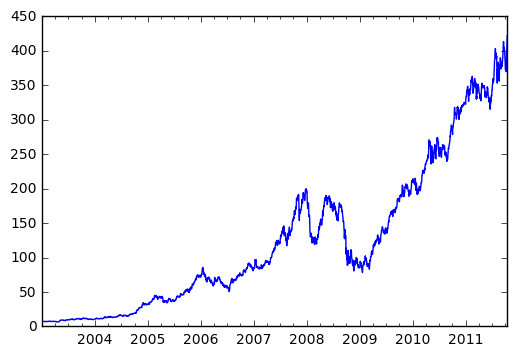

In [369]:
close_px['AAPL'].plot()

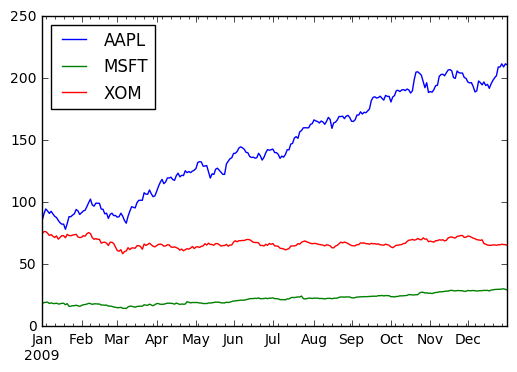

In [370]:
close_px.ix['2009'].plot()

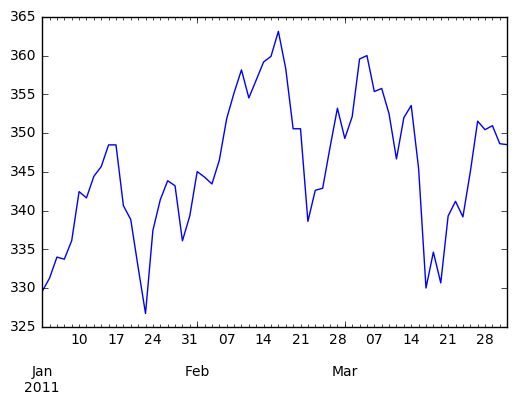

In [371]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

In [374]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


2003-03-31      7.07
2003-06-30      9.53
2003-09-30     10.36
2003-12-31     10.69
2004-03-31     13.52
2004-06-30     16.27
               ...  
2010-09-30    283.75
2010-12-31    322.56
2011-03-31    348.51
2011-06-30    335.67
2011-09-30    381.32
2011-12-31    422.00
Freq: Q-DEC, Name: AAPL, dtype: float64

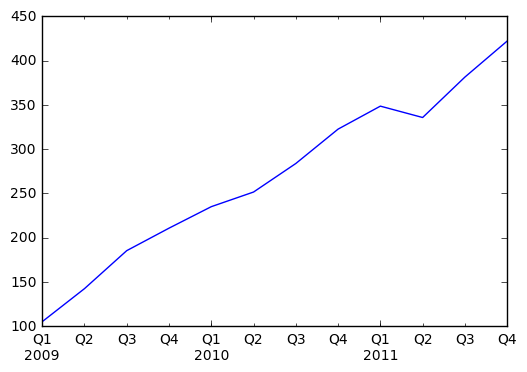

In [375]:
appl_q.ix['2009':].plot()

## Moving window functions

In [377]:
close_px = close_px.asfreq('B').fillna(method='ffill')
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
...,...,...,...
2011-10-07,369.80,26.25,73.56
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27


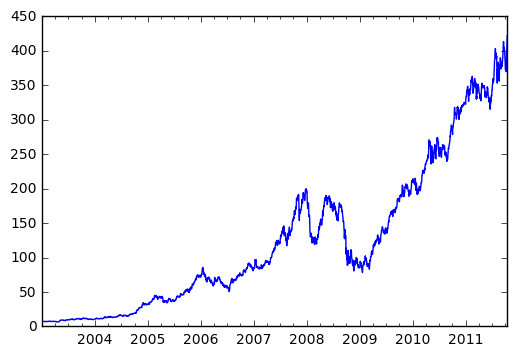

In [378]:
close_px.AAPL.plot()


/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).mean()
  if __name__ == '__main__':


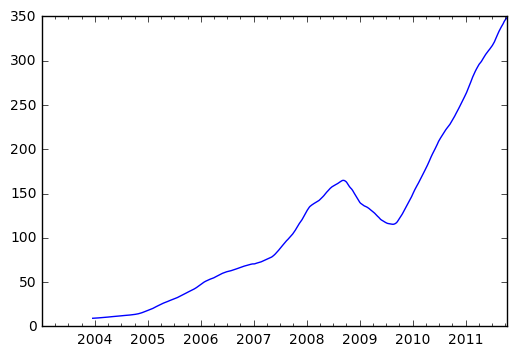

In [379]:
pd.rolling_mean(close_px.AAPL, 250).plot()

In [ ]:
plt.figure()

In [ ]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250[5:12]

In [ ]:
appl_std250.plot()

In [ ]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

In [ ]:
pd.rolling_mean(close_px, 60).plot(logy=True)

In [ ]:
plt.close('all')

### Exponentially-weighted functions

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### Binary moving window functions

In [ ]:
close_px
spx_px = close_px_all['SPX']

In [ ]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

In [ ]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

### User-defined moving window functions

In [ ]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

## Performance and Memory Usage Notes

In [ ]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

In [ ]:
ts.resample('15min', how='ohlc').info()

In [ ]:
%timeit ts.resample('15min', how='ohlc')

In [ ]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s', how='ohlc')